### Life Expectancy and GDP

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the data

In [2]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Next I'll take a look at the data to see what data is available and if there are any correlations.

In [3]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [4]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [5]:
df.corr()

,Year,Life expectancy at birth (years),GDP
Year,1.000000,0.155050,0.208288
Life expectancy at birth (years),0.155050,1.000000,0.343207
GDP,0.208288,0.343207,1.000000


As you can see, there is a correlation between GDP and Life expectancy at birth. I'll do some further research below to analyze that correlation further

In [6]:
avg = df.drop('Year',axis=1).groupby('Country').mean().reset_index()
avg

,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


#### Cleaning Column Name

To make things easier I'll rename the life expectancy column

In [7]:
df.rename({"Life expectancy at birth (years)":"life_exp_at_birth"}, axis = "columns", inplace=True)
df.head()

,Country,Year,life_exp_at_birth,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Exploratory Visualizations

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


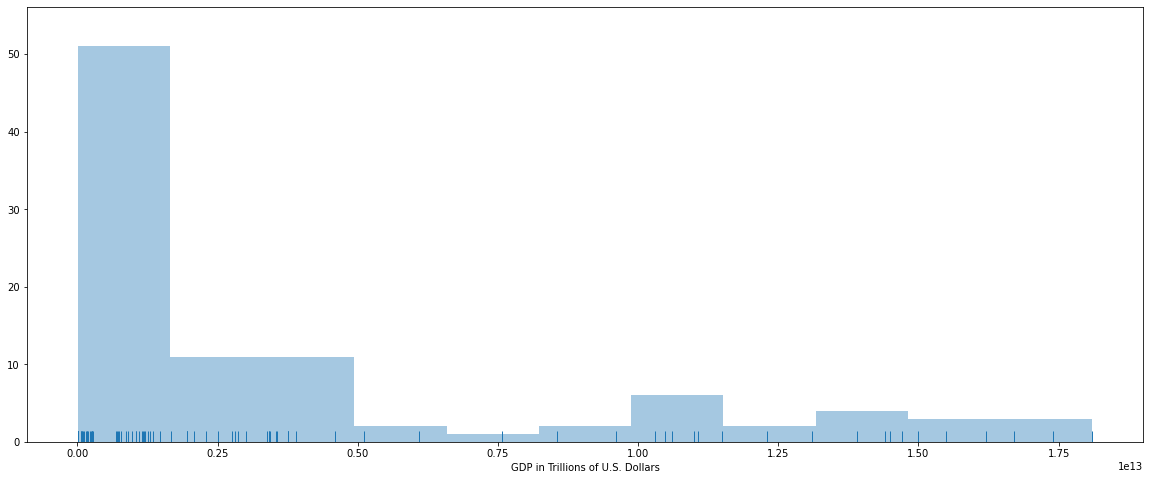

In [8]:
plt.figure(figsize=(20,8))
sns.distplot(df.GDP, rug = True, kde=False)
plt.xlabel('GDP in Trillions of U.S. Dollars');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


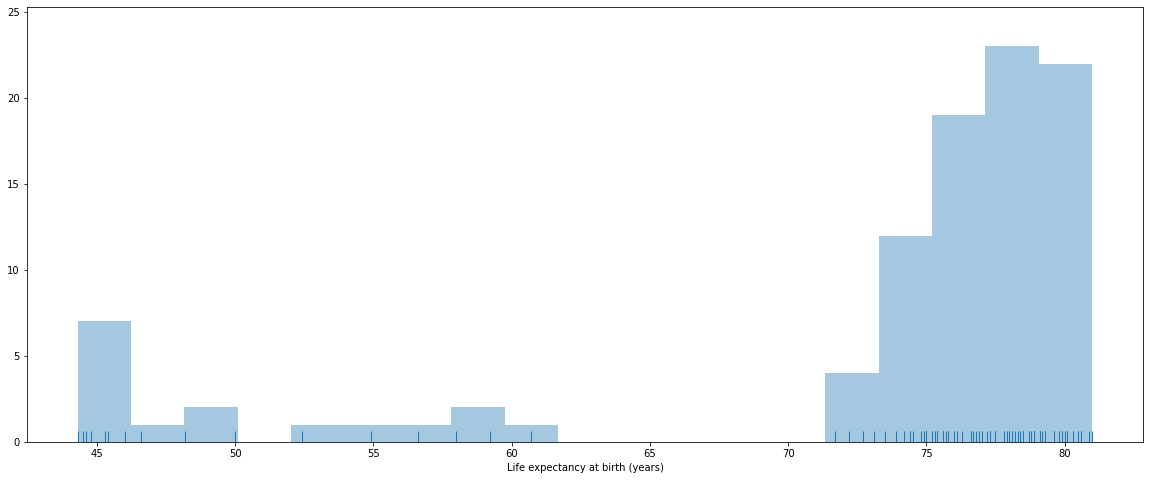

In [9]:
plt.figure(figsize=(20,8))
sns.distplot(df.life_exp_at_birth, rug = True, kde=False)
plt.xlabel("Life expectancy at birth (years)");

Next I'll do a further analysis to find out why our data is skewed. 

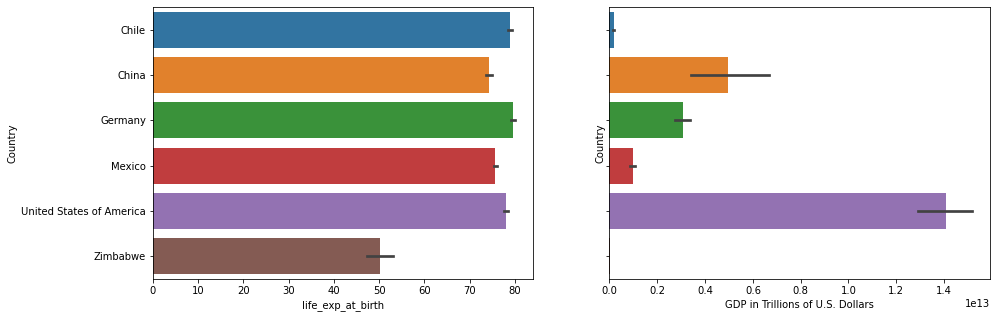

In [10]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
axes[0] = sns.barplot(ax=axes[0],x='life_exp_at_birth',y='Country', data=df)
axes[0] = plt.xlabel('Life expectancy at birth (years)')
axes[1] = sns.barplot(ax=axes[1],x='GDP',y='Country',data=df)
axes[1] = plt.xlabel('GDP in Trillions of U.S. Dollars');

Zimbabwe likely accounts for the skew in distribution from the previous visualization

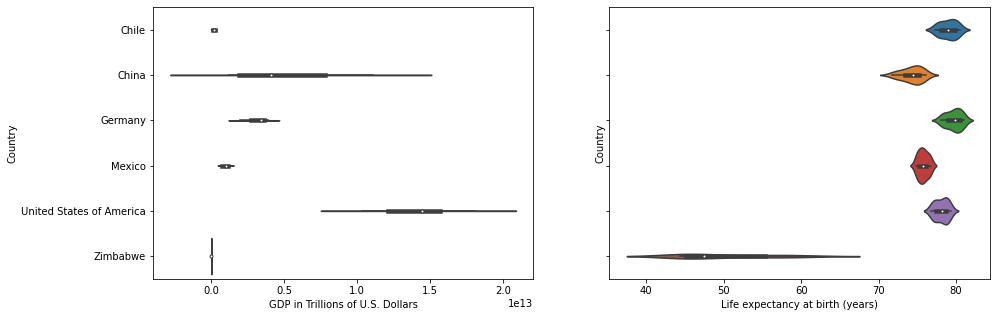

In [11]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP,y=df.Country)
axes[0].set_xlabel('GDP in Trillions of U.S. Dollars')
axes[1] = sns.violinplot(ax=axes[1], x=df.life_exp_at_birth,y=df.Country)
axes[1].set_xlabel('Life expectancy at birth (years)');

Next I'll take a look at each country closer. It will be helpful to see Zimbabwe separate from the other countries since their Life expectancy has increase so much but we can't see how much GDP has changed. 

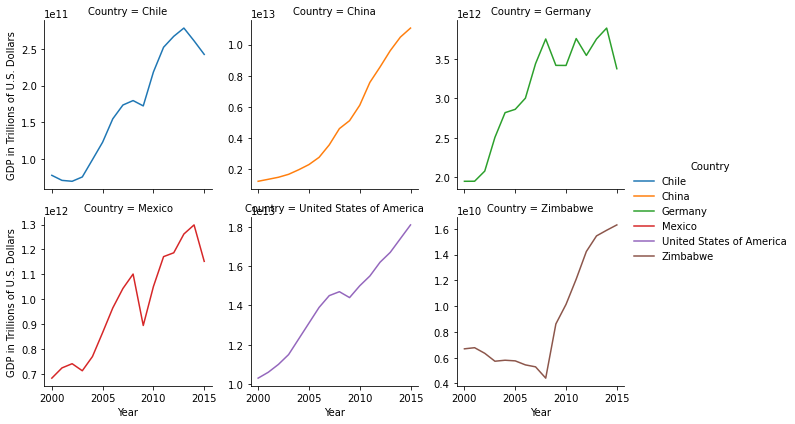

In [12]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3,
                        hue = 'Country', sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,'Year','GDP')
           .add_legend()
           .set_axis_labels('Year','GDP in Trillions of U.S. Dollars'))
graphGDP;

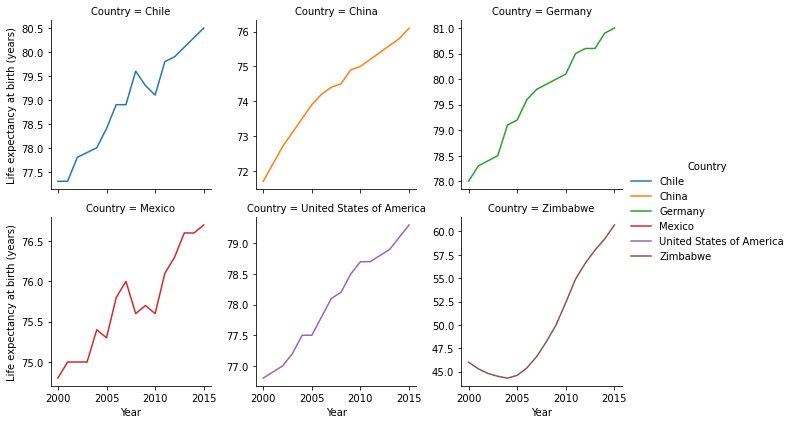

In [13]:
graphLE = sns.FacetGrid(df, col='Country', col_wrap=3,
                      hue = 'Country', sharey = False)

graphLE = (graphLE.map(sns.lineplot,'Year','life_exp_at_birth')
         .add_legend()
         .set_axis_labels('Year','Life expectancy at birth (years)'))

graphLE;

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our data.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - The life expectancy had a left skew, or most of the observations were on the right side.